shape of of dataset: (481028, 108)
Shape of X: (481028, 107)
Shape of Y: (481028, 1)
Activity_Label
0.0               67.2%
16.0               7.8%
15.0               2.1%
2.0                2.0%
1.0                1.9%
6.0                1.9%
4.0                1.9%
5.0                1.9%
3.0                1.9%
7.0                1.6%
8.0                1.5%
14.0               1.4%
13.0               1.4%
17.0               1.3%
9.0                1.1%
11.0               1.1%
10.0               1.0%
12.0               1.0%
Name: proportion, dtype: object


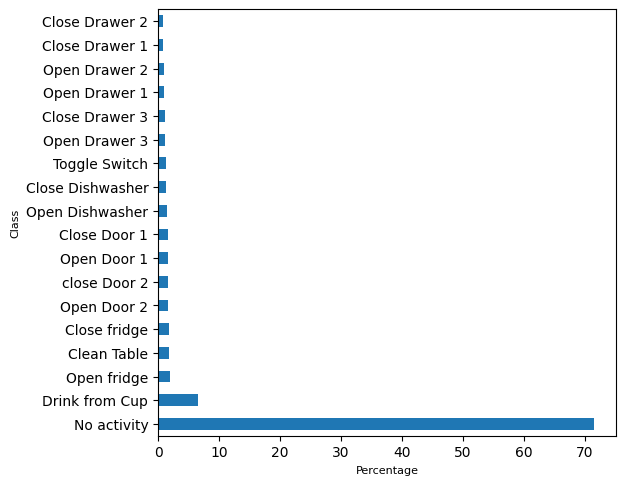

In [7]:
import pandas as pd
import numpy as np
import load_data
from matplotlib import pyplot as plt

from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm


s1r1 = load_data.load_data("S1-ADL1")
s1r2 = load_data.load_data("S1-ADL2")
s1r3 = load_data.load_data("S1-ADL3")
s1r4 = load_data.load_data("S1-ADL4")
s1r5 = load_data.load_data("S1-ADL5")
s1_drill = load_data.load_data("S1-Drill")
s2r1 = load_data.load_data("S2-ADL1")
s2r2 = load_data.load_data("S2-ADL2")
s2r3 = load_data.load_data("S2-ADL3")
s2r4 = load_data.load_data("S2-ADL4")
s2r5 = load_data.load_data("S2-ADL5")
s2_drill = load_data.load_data("S2-Drill")
s3r1 = load_data.load_data("S3-ADL1")
s3r2 = load_data.load_data("S3-ADL2")
s3r3 = load_data.load_data("S3-ADL3")
s3r4 = load_data.load_data("S3-ADL4")
s3r5 = load_data.load_data("S3-ADL5")
s3_drill = load_data.load_data("S1-Drill")
s4r1 = load_data.load_data("S4-ADL1")
s4r2 = load_data.load_data("S4-ADL2")
s4r3 = load_data.load_data("S4-ADL3")
s4r4 = load_data.load_data("S4-ADL4")
s4r5 = load_data.load_data("S4-ADL5")
s4_drill = load_data.load_data("S4-Drill")

def column_notation(data):
    data.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
                        '18',
                        '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
                        '35',
                        '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
                        '52',
                        '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
                        '69',
                        '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85',
                        '86',
                        '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101',
                        '102',
                        '103', '104', '105', '106', '107', 'Activity_Label']
    data['Activity_Label'] = data['Activity_Label'].replace(
            [406516, 406517, 404516, 404517, 406520, 404520, 406505, 404505, 406519, 404519, 406511, 404511, 406508,
             404508,
             408512, 407521, 405506], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
    return data

s1r1 = column_notation(s1r1)
s1r2 = column_notation(s1r2)
s1r3 = column_notation(s1r3)
s1r4 = column_notation(s1r4)
s1r5 = column_notation(s1r5)
s1_drill = column_notation(s1_drill)
s2r1 = column_notation(s2r1)
s2r2 = column_notation(s2r2)
s2r3 = column_notation(s2r3)
s2r4 = column_notation(s2r4)
s2r5 = column_notation(s2r5)
s2_drill = column_notation(s2_drill)
s3r1 = column_notation(s3r1)
s3r2 = column_notation(s3r2)
s3r3 = column_notation(s3r3)
s3r4 = column_notation(s3r4)
s3r5 = column_notation(s3r5)
s3_drill = column_notation(s3_drill)
s4r1 = column_notation(s4r1)
s4r2 = column_notation(s4r2)
s4r3 = column_notation(s4r3)
s4r4 = column_notation(s4r4)
s4r5 = column_notation(s4r5)
s4_drill = column_notation(s4_drill)


##########################################################################

# Activities list
activities = {'Old label': [0, 406516, 406517, 404516, 404517, 406520, 404520, 406505, 404505, 406519, 404519, 406511, 404511,
                      406508, 404508, 408512, 407521, 405506],
        'New label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
        'Activity': ['No activity', 'Open Door 1', 'Open Door 2', 'Close Door 1', 'close Door 2', 'Open fridge', 'Close fridge',
                     'Open Dishwasher', 'Close Dishwasher', 'Open Drawer 1', 'Close Drawer 1', 'Open Drawer 2',
                     'Close Drawer 2', 'Open Drawer 3', 'Close Drawer 3', 'Clean Table', 'Drink from Cup', 'Toggle Switch']}
activities = pd.DataFrame(activities)

data_train = np.concatenate((s1r1, s1r2, s1r3, s1_drill, s1r4, s1r5, s2r1, s2r2, s2_drill, s3r1, s3r2, s3_drill), axis=0)
data_val = np.concatenate((s2r3, s3r3), axis=0)
data_test = np.concatenate((s2r4, s2r5, s3r4, s3r5), axis=0)

#data =np.concatenate((data_train, data_test, data_val), axis=0) 
data =data_train
print('shape of of dataset:', data.shape)

# Converting the Numpy data to Pandas Dataframe 
df = pd.DataFrame(data)
df = column_notation(df) # Addiitng the Notation of column values. 

x, y = df.iloc[:, :-1], df.iloc[:, [-1]]
print('Shape of X:', x.shape)
print('Shape of Y:', y.shape)

print(y.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

label_per = {'Labels': ["No activity", "Drink from Cup", "Open fridge", "Clean Table", "Close fridge", "Open Door 2", "close Door 2", "Open Door 1", "Close Door 1", "Open Dishwasher", 
                   "Close Dishwasher", "Toggle Switch", "Open Drawer 3", "Close Drawer 3", "Open Drawer 1", "Open Drawer 2", "Close Drawer 1", "Close Drawer 2"],
        'Percentage':[71.5, 6.6, 2.0, 1.8, 1.8, 1.7, 1.6, 1.6, 1.6, 1.4, 1.3, 1.3,1.2, 1.1,0.9, 0.9, 0.8, 0.8]}
per = pd.DataFrame.from_dict(label_per)

#print(per)
per.plot(kind='barh', x='Labels', y='Percentage', legend=None)
plt.tight_layout()
plt.xlabel('Percentage', fontsize=8)
plt.ylabel('Class', fontsize=8)
plt.savefig('class_dis.png')

              Jittering  Rotation  Time_warping  Slicing  Convolve
Jittering         57.05     57.76         59.39    57.02     62.30
Rotation          54.38     60.75         56.82    57.70     58.65
Time_warping      61.71     56.77         63.22    59.19     60.56
Slicing           62.43     58.36         62.25    60.65     60.59
Convolve          60.97     58.89         61.38    60.49     58.98


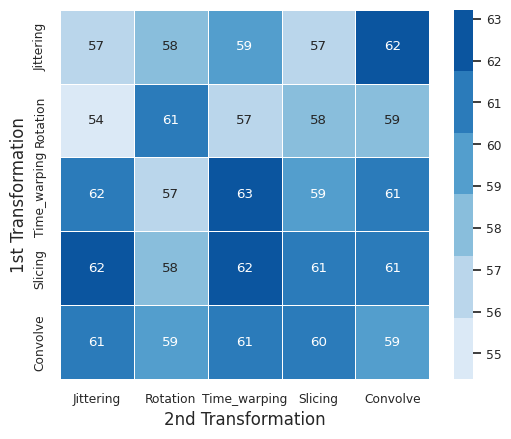

In [9]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
classes = ['Jittering', 'Rotation', 'Time_warping', 'Slicing', 'Convolve']
df = pd.DataFrame([[57.05, 57.76, 59.39, 57.02, 62.30], [54.38, 60.75, 56.82, 57.70, 58.65], [61.71, 56.77, 63.22, 59.19, 60.56], [62.43, 58.36, 62.25, 60.65, 60.59], [60.97, 58.89, 61.38, 60.49, 58.98]], classes, classes)
print(df)
colormap = sns.color_palette("Blues")
# plotting the heatmap
sns.set(font_scale=.8)
hm = sns.heatmap(data=df, annot=True, linewidth=.5, cmap=colormap, square=True, )
# displaying the plotted heatmap
# plt.title('Linear Evaluation(Opportunity F1-Macro) under individual or composition of Random Transformation Data Augmentation', fontsize = 20) # title with fontsize 20
plt.xlabel('2nd Transformation', fontsize=12) # x-axis label with fontsize 15
plt.ylabel('1st Transformation', fontsize=12) # y-axis label with fontsize 15
plt.savefig('output.png', dpi=500)
#sns.plt.show()

In [3]:
import numpy as np
DTW_1K = np.array([58.07, 61.60, 57.98])
DTW_2K = np.array([58.45, 60.64, 59.10])
DTW_3K = np.array([60.54, 62.63, 60.47])
DTW_4K = np.array([60.57, 59.72, 60.02])
DTW_5K = np.array([58.13, 57.42, 57.89])
DTW_6K = np.array([56.36, 59.01, 59.13])
DTW_7K = np.array([61.75, 59.65, 57.86])
DTW_8K = np.array([59.75, 56.28, 59.85])
DTW_9K = np.array([58.83, 56.36, 59.07])
DTW_10K = np.array([60.47, 58.46, 59.44])
print('DTW 1k average=',np.average(DTW_1K), 2, 'std=',np.mean((DTW_1K - np.mean(DTW_1K)) ** 2))
print('DTW 2k average=',np.average(DTW_2K), 2, 'std=',np.mean((DTW_2K - np.mean(DTW_2K)) ** 2))
print('DTW 3k average=',np.average(DTW_3K), 2, 'std=',np.mean((DTW_3K - np.mean(DTW_3K)) ** 2))
print('DTW 4k average=',np.average(DTW_4K), 2, 'std=',np.mean((DTW_4K - np.mean(DTW_4K)) ** 2))
print('DTW 5k average=',np.average(DTW_5K), 2, 'std=',np.mean((DTW_5K - np.mean(DTW_5K)) ** 2))
print('DTW 6k average=',np.average(DTW_6K), 2, 'std=',np.mean((DTW_6K - np.mean(DTW_6K)) ** 2))
print('DTW 7k average=',np.average(DTW_7K), 2, 'std=',np.mean((DTW_7K - np.mean(DTW_7K)) ** 2))
print('DTW 8k average=',np.average(DTW_8K), 2, 'std=',np.mean((DTW_8K - np.mean(DTW_8K)) ** 2))
print('DTW 9k average=',np.average(DTW_9K), 2, 'std=',np.mean((DTW_9K - np.mean(DTW_9K)) ** 2))
print('DTW 10k average=',np.average(DTW_10K), 2, 'std=',np.mean((DTW_10K - np.mean(DTW_10K)) ** 2))



DTW 1k average= 59.21666666666667 2 std= 2.8414888888888936
DTW 2k average= 59.39666666666667 2 std= 0.843355555555554
DTW 3k average= 61.21333333333333 2 std= 1.0042888888888923
DTW 4k average= 60.10333333333333 2 std= 0.12388888888888909
DTW 5k average= 57.81333333333333 2 std= 0.08695555555555567
DTW 6k average= 58.166666666666664 2 std= 1.6344222222222236
DTW 7k average= 59.75333333333333 2 std= 2.5273555555555567
DTW 8k average= 58.626666666666665 2 std= 2.755088888888888
DTW 9k average= 58.086666666666666 2 std= 1.500288888888889
DTW 10k average= 59.45666666666667 2 std= 0.6734888888888876


In [4]:
RTW_1K = np.array([61.26, 57.56, 59.76])
RTW_2K = np.array([57.76, 54.02, 57.55])
RTW_3K = np.array([60.59, 59.81, 61.10])
RTW_4K = np.array([60.44, 59.46, 61.52])
RTW_5K = np.array([58.76, 58.44, 61.87])
RTW_6K = np.array([62.10,  58.92, 59.80])
RTW_7K = np.array([58.07, 58.07, 58.17])
RTW_8K = np.array([58.40, 59.11, 60.90])
RTW_9K = np.array([59.92, 60.00, 60.47])
RTW_10K = np.array([57.40, 60.29, 55.46])

print('RTW 1k average=',np.average(RTW_1K), 2, 'std=',np.mean((RTW_1K - np.mean(RTW_1K)) ** 2))
print('RTW 2k average=',np.average(RTW_2K), 2, 'std=',np.mean((RTW_2K - np.mean(RTW_2K)) ** 2))
print('RTW 3k average=',np.average(RTW_3K), 2, 'std=',np.mean((RTW_3K - np.mean(RTW_3K)) ** 2))
print('RTW 4k average=',np.average(RTW_4K), 2, 'std=',np.mean((RTW_4K - np.mean(RTW_4K)) ** 2))
print('RTW 5k average=',np.average(RTW_5K), 2, 'std=',np.mean((RTW_5K - np.mean(RTW_5K)) ** 2))
print('RTW 6k average=',np.average(RTW_6K), 2, 'std=',np.mean((RTW_6K - np.mean(RTW_6K)) ** 2))
print('RTW 7k average=',np.average(RTW_7K), 2, 'std=',np.mean((RTW_7K - np.mean(RTW_7K)) ** 2))
print('RTW 8k average=',np.average(RTW_8K), 2, 'std=',np.mean((RTW_8K - np.mean(RTW_8K)) ** 2))
print('RTW 9k average=',np.average(RTW_9K), 2, 'std=',np.mean((RTW_9K - np.mean(RTW_9K)) ** 2))
print('RTW 10k average=',np.average(RTW_10K), 2, 'std=',np.mean((RTW_10K - np.mean(RTW_10K)) ** 2))

RTW 1k average= 59.526666666666664 2 std= 2.3088888888888834
RTW 2k average= 56.44333333333333 2 std= 2.9436222222222135
RTW 3k average= 60.5 2 std= 0.2813999999999997
RTW 4k average= 60.473333333333336 2 std= 0.7078222222222239
RTW 5k average= 59.69 2 std= 2.393266666666666
RTW 6k average= 60.27333333333333 2 std= 1.7974222222222236
RTW 7k average= 58.10333333333333 2 std= 0.0022222222222222855
RTW 8k average= 59.47 2 std= 1.1064666666666665
RTW 9k average= 60.129999999999995 2 std= 0.05886666666666617
RTW 10k average= 57.71666666666667 2 std= 3.9382888888888865


In [5]:
TW_1K = np.array([59.83, 60.69, 57.38])
TW_2K = np.array([59.21, 60.48, 58.00])
TW_3K = np.array([62.98, 59.52, 61.11])
TW_4K = np.array([60.06, 60.30, 60.72])
TW_5K = np.array([62.76, 60.26, 59.89])
TW_6K = np.array([59.08, 61.25, 58.95])
TW_7K = np.array([60.86, 61.19, 59.14])
TW_8K = np.array([58.32, 58.59, 60.56])
TW_9K = np.array([62.76, 63.04, 63.87])
TW_10K = np.array([61.24, 61.89, 58.69])

print('TW 1k average=',np.average(TW_1K), 2, 'std=',np.mean((TW_1K - np.mean(TW_1K)) ** 2))
print('TW 2k average=',np.average(TW_2K), 2, 'std=',np.mean((TW_2K - np.mean(TW_2K)) ** 2))
print('TW 3k average=',np.average(TW_3K), 2, 'std=',np.mean((TW_3K - np.mean(TW_3K)) ** 2))
print('TW 4k average=',np.average(TW_4K), 2, 'std=',np.mean((TW_4K - np.mean(TW_4K)) ** 2))
print('TW 5k average=',np.average(TW_5K), 2, 'std=',np.mean((TW_5K - np.mean(TW_5K)) ** 2))
print('TW 6k average=',np.average(TW_6K), 2, 'std=',np.mean((TW_6K - np.mean(TW_6K)) ** 2))
print('TW 7k average=',np.average(TW_7K), 2, 'std=',np.mean((TW_7K - np.mean(TW_7K)) ** 2))
print('TW 8k average=',np.average(TW_8K), 2, 'std=',np.mean((TW_8K - np.mean(TW_8K)) ** 2))
print('TW 9k average=',np.average(TW_9K), 2, 'std=',np.mean((TW_9K - np.mean(TW_9K)) ** 2))
print('TW 10k average=',np.average(TW_10K), 2, 'std=',np.mean((TW_10K - np.mean(TW_10K)) ** 2))


TW 1k average= 59.300000000000004 2 std= 1.9664666666666608
TW 2k average= 59.23 2 std= 1.025266666666664
TW 3k average= 61.20333333333334 2 std= 1.9996222222222146
TW 4k average= 60.35999999999999 2 std= 0.0743999999999994
TW 5k average= 60.97 2 std= 1.6248666666666647
TW 6k average= 59.76 2 std= 1.112866666666666
TW 7k average= 60.39666666666667 2 std= 0.8077555555555538
TW 8k average= 59.156666666666666 2 std= 0.9968222222222228
TW 9k average= 63.22333333333333 2 std= 0.2221555555555552
TW 10k average= 60.60666666666666 2 std= 1.9072222222222264


In [6]:
GAN_1K= np.array([52.84, 55.55, 57.16])
GAN_2K = np.array([56.85, 55.82, 54.42])
GAN_3K = np.array([54.58, 59.04, 53.47])
GAN_4K = np.array([57.22, 56.32, 55.76])
GAN_5K = np.array([52.18, 54.67, 55.27])
GAN_6K = np.array([53.16, 56.07, 56.03])
GAN_7K = np.array([59.05, 56.38, 53.28])
GAN_8K = np.array([55.90, 55.60, 54.33])
GAN_9K = np.array([54.83, 52.95, 54.36])
GAN_10K = np.array([54.13, 53.05, 56.75])

print('GAN 1k average=',np.average(GAN_1K), 2, 'std=',np.mean((GAN_1K - np.mean(GAN_1K)) ** 2))
print('GAN 2k average=',np.average(GAN_2K), 2, 'std=',np.mean((GAN_2K - np.mean(GAN_2K)) ** 2))
print('GAN 3k average=',np.average(GAN_3K), 2, 'std=',np.mean((GAN_3K - np.mean(GAN_3K)) ** 2))
print('GAN 4k average=',np.average(GAN_4K), 2, 'std=',np.mean((GAN_4K - np.mean(GAN_4K)) ** 2))
print('GAN 5k average=',np.average(GAN_5K), 2, 'std=',np.mean((GAN_5K - np.mean(GAN_5K)) ** 2))
print('GAN 6k average=',np.average(GAN_6K), 2, 'std=',np.mean((GAN_6K - np.mean(GAN_6K)) ** 2))
print('GAN 7k average=',np.average(GAN_7K), 2, 'std=',np.mean((GAN_7K - np.mean(GAN_7K)) ** 2))
print('GAN 8k average=',np.average(GAN_8K), 2, 'std=',np.mean((GAN_8K - np.mean(GAN_8K)) ** 2))
print('GAN 9k average=',np.average(GAN_9K), 2, 'std=',np.mean((GAN_9K - np.mean(GAN_9K)) ** 2))
print('GAN 10k average=',np.average(GAN_10K), 2, 'std=',np.mean((GAN_10K - np.mean(GAN_10K)) ** 2))


GAN 1k average= 55.18333333333334 2 std= 3.1776222222222117
GAN 2k average= 55.696666666666665 2 std= 0.9917555555555552
GAN 3k average= 55.696666666666665 2 std= 5.7942888888888895
GAN 4k average= 56.43333333333333 2 std= 0.36168888888888917
GAN 5k average= 54.04 2 std= 1.7898000000000034
GAN 6k average= 55.086666666666666 2 std= 1.8562888888888942
GAN 7k average= 56.23666666666667 2 std= 5.559088888888881
GAN 8k average= 55.276666666666664 2 std= 0.4630888888888897
GAN 9k average= 54.04666666666666 2 std= 0.6381555555555525
GAN 10k average= 54.64333333333334 2 std= 2.4134222222222244


In [11]:
""""
This Functon will plot the Epoch vs Losses (Discriminator and generator)
1st we will take the average of d_loss_real , d_loss_fake, and g_loss
2nd we will plot them in the graphs
"""
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv(f'~/Documents/DA_Project/OPPORTUNITY/CGAN_500_epochs_32Batch_Minority_withoutBatchNormalization_labelSmoothing_conv2d_lstm.csv')
print(data.head())
data = data.drop(['gen_activation', ' batch_per_epoch'], axis=1)




  gen_activation; epochs; batch_per_epoch; d_loss_real; d_loss_fake; g_loss
0  tanh;0;0;0.683046817779541;0.6939310431480408;...                       
1  tanh;0;1;0.6785539388656616;0.6936156153678894...                       
2  tanh;0;2;0.6760863661766052;0.6943962574005127...                       
3  tanh;0;3;0.6661670207977295;0.6943867206573486...                       
4  tanh;0;4;0.6854432821273804;0.6953558921813965...                       


KeyError: "['gen_activation', ' batch_per_epoch'] not found in axis"